In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


In [2]:
df = pd.read_csv("Housing for task.csv")
df.head()


,area,bedrooms,price
0,7420,4,13300000
1,8960,4,12250000
2,9960,3,12250000
3,7500,4,12215000
4,7420,4,11410000


In [3]:
# Check missing values
df.isnull().sum()

# Fill numeric missing values with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical missing values with mode
categorical_cols = df.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check again
df.isnull().sum()


area        0
bedrooms    0
price       0
dtype: int64

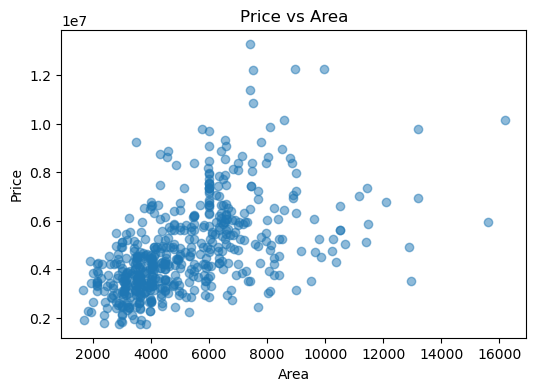

In [4]:
plt.figure(figsize=(6,4))
plt.scatter(df['area'], df['price'], alpha=0.5)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Price vs Area")
plt.show()


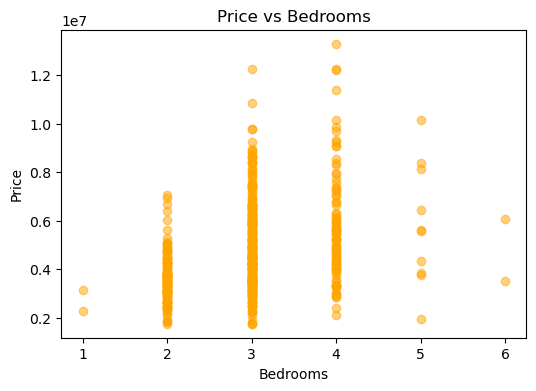

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(df['bedrooms'], df['price'], alpha=0.5, color='orange')
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Price vs Bedrooms")
plt.show()


In [6]:
X = df[['area', 'bedrooms']]
y = df['price']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
y_pred = model.predict(X_test)


In [10]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


MAE: 1381158.90
MSE: 3280176595474.01
RMSE: 1811125.78
R²: 0.3510


In [11]:
joblib.dump(model, "house_price_model.pk")
print("Model saved as house_price_model.pk")


Model saved as house_price_model.pk


In [13]:
# This is a bonous Point code 



import joblib

# Save the model
joblib.dump(model, "house_price_model.pkl")
print("✅ Model saved as house_price_model.pkl")


✅ Model saved as house_price_model.pkl


In [14]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("house_price_model.pkl")

st.title("🏠 House Price Prediction App")
st.write("Enter the details below to predict the house price:")

# Input fields
area = st.number_input("Area (in sqft)", min_value=500, max_value=10000, step=50)
bedrooms = st.number_input("Number of Bedrooms", min_value=1, max_value=10, step=1)

# Predict button
if st.button("Predict Price"):
    input_data = pd.DataFrame({
        "area": [area],
        "bedrooms": [bedrooms]
    })
    prediction = model.predict(input_data)
    st.success(f"Estimated Price: ₹{prediction[0]:,.2f}")


Overwriting app.py
